In [127]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

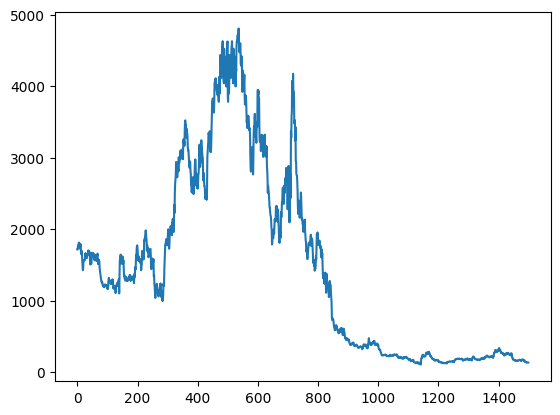

In [128]:
# 2. Đọc file csv và gắng index với giá Close
data = pd.read_csv('dataset/ETHUSDT.csv')
df1=data.reset_index()['Close']

plt.plot(df1)

In [129]:
#đảo ngược dữ liệu
df1=df1.loc[::-1].reset_index(drop=True)
data=data.loc[::-1].reset_index(drop=True)

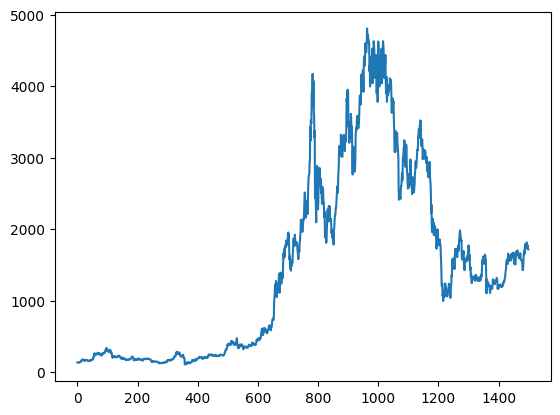

In [130]:
#ve do thi
plt.plot(df1)


In [131]:

# tiền sử lý dataset
train_size = int(len(data)*0.6);
val_size = int(len(data)*0.2);
test_size = int(len(data)*0.2);

df_train = df1[:train_size];
df_val = df1[train_size:train_size+val_size];
df_test = df1[train_size+val_size:train_size+val_size+test_size];
# #convert index
# def convertIndex(df):
#     data=[];
#     for val in df:
#         data.append(float(val));
#     return pd.DataFrame(data);

# df_train = convertIndex(df_train);
# df_val = convertIndex(df_val);
# df_test = convertIndex(df_test);



In [132]:
# Xem data
print(df_train.shape);
print(df_val.shape);
print(df_test.shape);

(900,)
(300,)
(300,)


In [133]:
# train data => lấy được alpha tối ưu
train_data =df_train.values.tolist()

# Khởi tạo đối tượng SES với dữ liệu huấn luyện
model = SimpleExpSmoothing(train_data)

# Huấn luyện mô hình và ước lượng trọng số alpha
fitted_model = model.fit()

# Lấy trọng số alpha
alpha = fitted_model.params['smoothing_level']

print(alpha)

0.8741328411787973


In [134]:
# Khởi tạo đối tượng SES với trọng số alpha đã được ước lượng từ tập huấn luyện
model = SimpleExpSmoothing(train_data)
fitted_model = model.fit(smoothing_level=alpha)

In [135]:
# Quá trình validate, dự đoán trên tập validation

history = df_train.values.tolist()
predict_val = []
for new_obs in df_val.values:   
    model = SimpleExpSmoothing(history)  
    model_fit = model.fit(smoothing_level=alpha)  
    prediction = model_fit.forecast(steps=1)      
    predict_val.append(prediction[0])   
    history.append(new_obs)

print(predict_val)

[3942.6640026984664, 3928.7705329619525, 3496.773616971845, 3498.7197714937984, 3434.21770888799, 3237.2251345361874, 3263.435890176434, 3386.4911627609235, 3298.08035079659, 3417.2156090780286, 3588.8379480357607, 3570.6053306581016, 3421.307523009863, 3433.836011842381, 3341.8632404730984, 3023.1690566321763, 2798.2817252109035, 3041.848592013455, 3138.572621657168, 2954.967468019345, 2925.9135056660057, 3042.572210231942, 2940.3142184345193, 2821.9529442667585, 2846.863156560087, 2981.25832163849, 3268.543547002817, 3372.7545637765033, 3412.0690696258043, 3389.5522209076776, 3499.4462603323377, 3565.3941108371846, 3584.6913705526244, 3565.84386845175, 3573.690199824817, 3434.292060968599, 3528.548003672571, 3496.128161648617, 3593.412012506723, 3765.9728174856095, 3856.0235199271483, 3833.24054120211, 3845.137016088015, 3757.5689963941845, 3861.9937828862066, 4123.496056908188, 4061.8643970627195, 3983.485802905701, 4144.006485349328, 4090.0930439769973, 4203.97240968551, 4140.63937

In [136]:
# Quá trình testing, dự đoán trên tập test
history = df_train.values.tolist() + df_val.values.tolist()
predict_test = []
for new_obs in df_test.values:   
    model = SimpleExpSmoothing(history)  
    model_fit = model.fit(smoothing_level=alpha)  
    prediction = model_fit.forecast(steps=1)      
    predict_test.append(prediction[0])   
    history.append(new_obs)

print(predict_test)

[1834.0760865793404, 1834.0795074288603, 1782.5410656855681, 1801.8060219543954, 1805.6731664527124, 1853.0221745590618, 1818.3259412391842, 1795.2086754861289, 1789.6153831036577, 1678.8580465786094, 1551.2625833015306, 1449.4937797827884, 1239.9870577051981, 1212.8128396294642, 1234.4101799216207, 1089.382642966249, 1087.2474485301764, 1006.7245615243517, 1113.1986955300993, 1126.3467937414089, 1125.9125300167511, 1059.7209797119617, 1134.0214148137588, 1213.5662666258586, 1238.7358145883416, 1202.943733347854, 1193.8232643723925, 1150.3148193718096, 1106.5165512575793, 1075.4791087263309, 1061.7122955693494, 1066.3431929950395, 1073.26353399535, 1141.2155318871937, 1133.5969992362568, 1179.9024388996343, 1230.2416173008546, 1216.0792515379671, 1216.9015906639186, 1174.469792101529, 1106.2264229215814, 1047.0944630575568, 1106.4529229968264, 1182.4737011066259, 1225.1106658404774, 1339.394211463165, 1338.743671782431, 1550.542849574445, 1543.3549867133495, 1524.3207557109788, 1569.01

In [137]:
# dua cac gia tri du doan ve dung dang cua no
predict_val = np.array(predict_val) 
predict_test = np.array(predict_test)


In [138]:
# 7. Đánh giá độ chính xác của mô hình bang MAE và RMSE va MAPE
# 7.1. Đánh giá độ chính xác trên tập validation
print('Độ chính xác trên tập validation')
print('RMSE: ', np.sqrt(mean_squared_error(df_val, predict_val)))
print('MAE: ', mean_absolute_error(df_val, predict_val))
print('MAPE: ', np.mean(np.abs((df_val - predict_val) / df_val)) * 100)

# 7.2. Đánh giá độ chính xác trên tập test
print('Độ chính xác trên tập test')
print('RMSE: ', np.sqrt(mean_squared_error(df_test, predict_test)))
print('MAE: ', mean_absolute_error(df_test, predict_test))
print('MAPE: ', np.mean(np.abs((df_test - predict_test) / df_test)) * 100)


Độ chính xác trên tập validation
RMSE:  152.79304089008565
MAE:  114.29591289852911
MAPE:  3.438467448113208
Độ chính xác trên tập test
RMSE:  62.28045887425033
MAE:  42.21226410519402
MAPE:  2.9494474726154225


In [139]:
#In cac shape ban dau
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

#In cac shape sau khi predict
print(predict_val.shape)
print(predict_test.shape)

print("train_size: ",train_size)
print("val_size: ",val_size)
print("test_size: ",test_size)

print("df_train: ",df_train.shape)
print("df_val: ",df_val.shape)
print("df_test: ",df_test.shape)

(900,)
(300,)
(300,)
(300,)
(300,)
train_size:  900
val_size:  300
test_size:  300
df_train:  (900,)
df_val:  (300,)
df_test:  (300,)


In [140]:
# dự đoán 30 ngày
last_index =  df1.index[-1]
last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
# x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
next_30_days = model_fit.forecast(30)
print(last_index)
print(last_data)
print(next_30_days)

1499
RangeIndex(start=1500, stop=1530, step=1)
[1722.12558322 1722.12558322 1722.12558322 1722.12558322 1722.12558322
 1722.12558322 1722.12558322 1722.12558322 1722.12558322 1722.12558322
 1722.12558322 1722.12558322 1722.12558322 1722.12558322 1722.12558322
 1722.12558322 1722.12558322 1722.12558322 1722.12558322 1722.12558322
 1722.12558322 1722.12558322 1722.12558322 1722.12558322 1722.12558322
 1722.12558322 1722.12558322 1722.12558322 1722.12558322 1722.12558322]


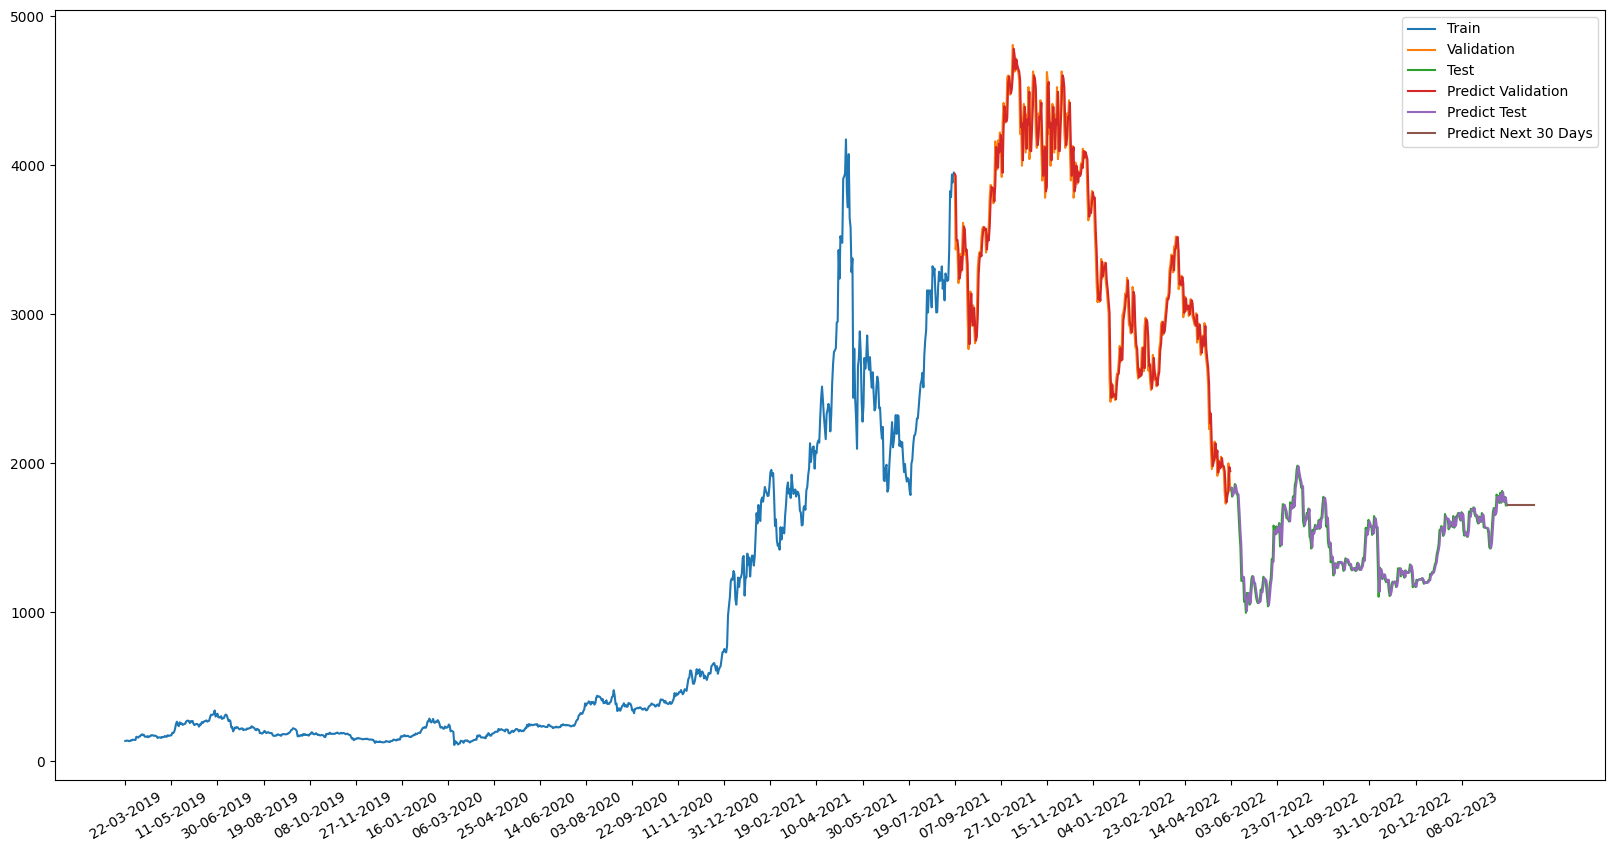

In [141]:
#ve do thi
#tao index
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
#tao index cho train, val, test
index_train = np.arange(0,train_size,1)
index_val = np.arange(train_size,train_size+val_size,1)
index_test = np.arange(train_size+val_size,train_size+val_size+test_size,1)
#tao index cho predict
index_predict_val = np.arange(train_size,train_size+val_size,1)
index_predict_test = np.arange(train_size+val_size,train_size+val_size+test_size,1)
index_predict_next_30_days = np.arange(last_index+1,last_index+31,1)
#chinh kich thuoc do thi
plt.figure(figsize=(20,10))
plt.plot(index_train,df_train,label='Train')
plt.plot(index_val,df_val,label='Validation')
plt.plot(index_test,df_test,label='Test')
plt.plot(index_predict_val,predict_val,label='Predict Validation')
plt.plot(index_predict_test,predict_test,label='Predict Test')
plt.plot(index_predict_next_30_days,next_30_days,label='Predict Next 30 Days')
plt.xticks(np.arange(0, len(df1), 50), data['Close time'][0:len(data):50])
plt.xticks(rotation=30) #Xoay nhan 30 do
plt.legend(loc='best')
plt.show()
